<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders, Jef fHale_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions using a dataset of Sacramento real estate sales.  

### 1. Read in the Sacramento housing data set.

In [60]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
sac_csv = 'data/sacramento_real_estate_transactions.csv'

In [75]:
# A:
housing = pd.read_csv(sac_csv, parse_dates=True)

### 2. Conduct exploratory data analysis on this dataset. 

#### Report any notable findings here and any steps you take to clean/process data.

> **Note:** Many EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [76]:
# A:
housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [78]:
# fix date column


In [79]:
# check for duplicates -- looks like there are dupes
housing[housing.duplicated()== True]

housing[housing['street'] == '8306 CURLEW CT']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
403,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519


In [80]:
# drop duplicates
housing_dedupe = housing.drop_duplicates()

In [81]:
housing_dedupe['city'].value_counts()

SACRAMENTO         438
ELK GROVE          114
LINCOLN             71
ROSEVILLE           48
CITRUS HEIGHTS      34
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: city, dtype: int64

In [82]:
housing_dedupe['state'].value_counts()

CA    981
AC      1
Name: state, dtype: int64

In [83]:
housing_dedupe['type'].value_counts()

Residential     914
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [84]:
housing_dedupe['price'].describe()

count       982.000000
mean     234185.358452
std      138992.002773
min     -210944.000000
25%      145000.000000
50%      215000.000000
75%      300000.000000
max      884790.000000
Name: price, dtype: float64

In [85]:
housing_dedupe['sq__ft'].describe()

count     982.000000
mean     1314.776986
std       856.266836
min      -984.000000
25%       953.000000
50%      1304.500000
75%      1719.500000
max      5822.000000
Name: sq__ft, dtype: float64

In [86]:
# seem to be some houses with 0 sq ft, but I think we can keep these as it might have meaning. 
housing_dedupe[housing_dedupe['sq__ft'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [87]:
# remove negative home price record
housing_dedupe = housing_dedupe[housing_dedupe['price'] > 0]

In [88]:
housing_dedupe[housing_dedupe['price'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [32]:
# check for nulls - no nulls, yay!
housing_dedupe.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables in the dataset you think might be good predictors of price. 

For each of the numeric variables you believe might be a potential predictor in an regression model, generate a plot showing the relationship between the independent and dependent variables.

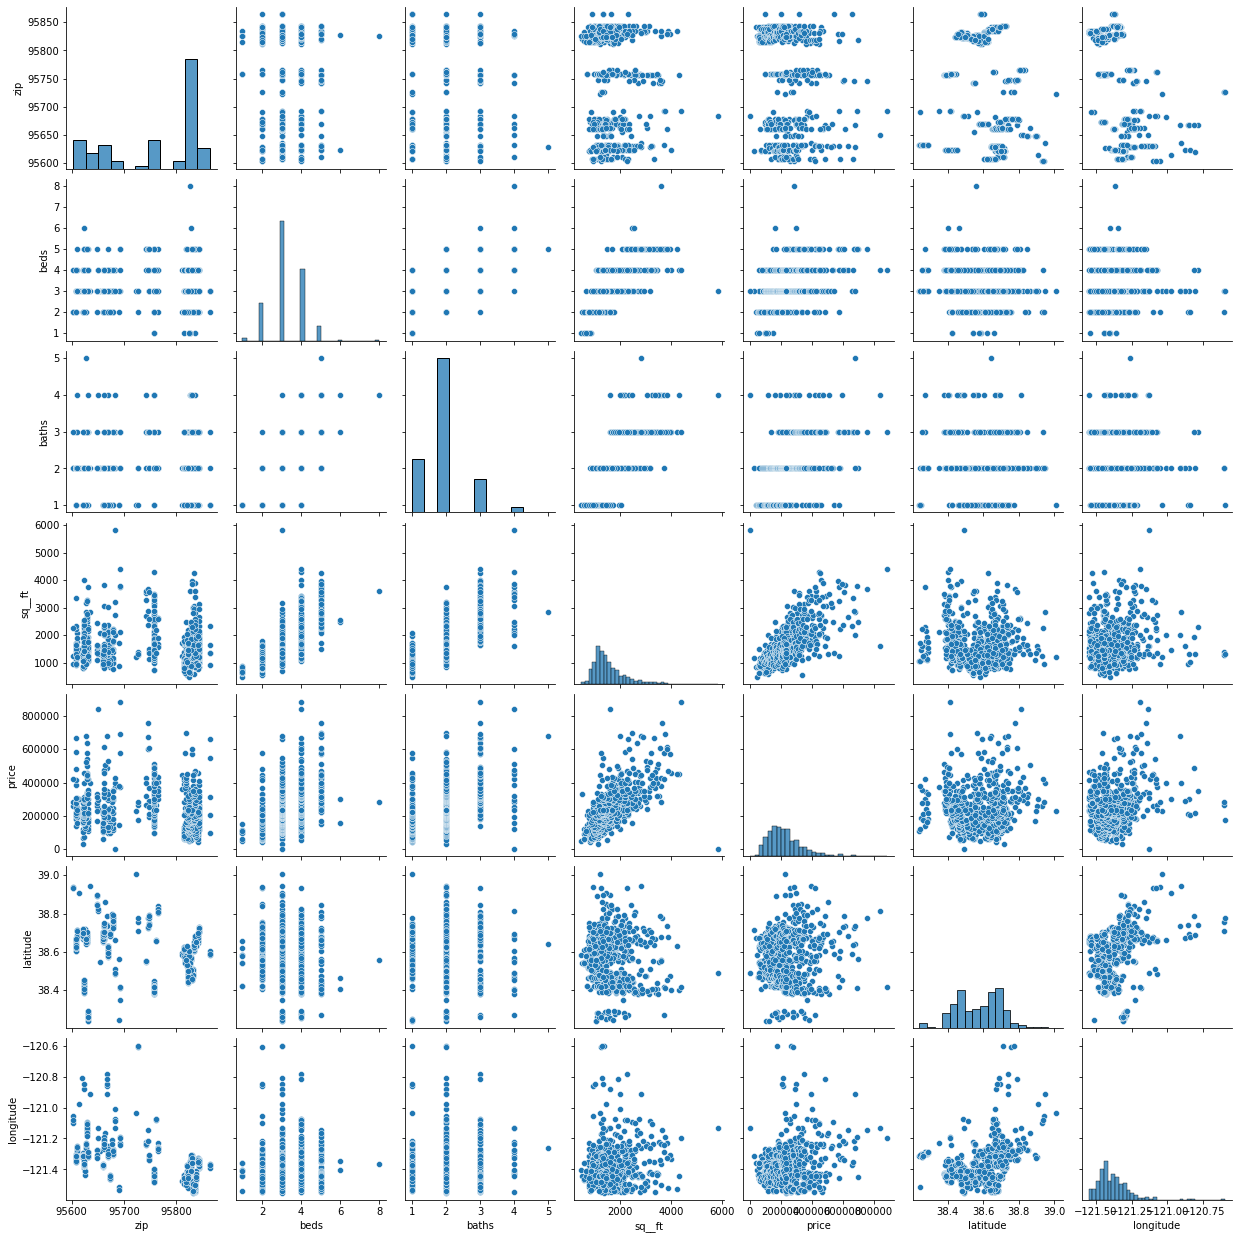

In [70]:
# A:
sns.pairplot(housing_dedupe)

<AxesSubplot:>

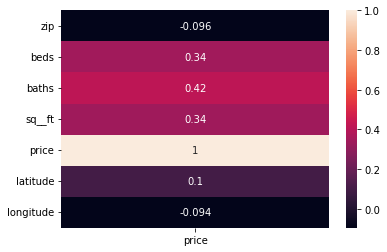

In [92]:
sns.heatmap(housing.corr()[['price']], annot =True)
# baths, beds and sq__ft seem to be the strongest 

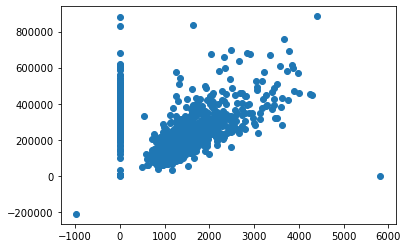

In [98]:
plt.scatter(housing['sq__ft'],housing['price'] )
# so there are houses with 0 sq ft and there is a house with negative sq ft...
# maybe we drop the record with negative sqft?

<AxesSubplot:>

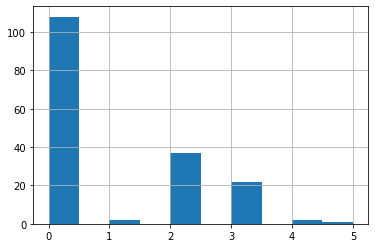

In [101]:
# look at houses with no sq feet, but still has baths
housing.loc[housing['sq__ft']<=0]['baths'].hist()

When you've finished cleaning or have made a good deal of progress cleaning, it's a good idea to save your work. For example:
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which single numeric feature would likely be the best predictor of price? Why?

In [1]:
# A: let's look at sq_ft first, seems to have a linear relationship

### 5. Make a DataFrame *X* that consists of a single numeric column you chose above.

In [105]:
# A: 
X= housing_dedupe[['sq__ft']]

### 6. Make a Series named _y_ that consists of only the 'price' column.

In [106]:
# A: 
y=housing_dedupe['price']

### 7. Use scikit-learn's LinearRegression class to instantiate and fit a model with just the one numeric column you think is the best predictor of price. 

This is simple linear regression because there is only one predictor column. 

> Note: Scikit-learn estimators expect a 2-dimensional predictor array because usually we have more than one predictor. Make yours 2-dimensional before fitting the model.

To construct your model don't forget to load in the scikit-learn class and instantiate a model

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# ...
```

In [110]:
# A:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X,y)

LinearRegression()

In [111]:
model_1.coef_

array([53.76646388])

In [112]:
model_1.intercept_

163822.20882516206

### 8. Use your model to make predict price for each row.

In [113]:
# A:
yhat= model_1.predict(X)


No handles with labels found to put in legend.


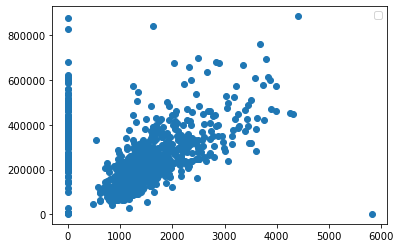

In [114]:
plt.scatter(X,y)
plt.legend();

### 9. Score your model on r-squared, mean_absolute_error, and root_mean_squared_error

Feel free to make a function that accepts y_true and y_predicted and prints out the model's performance on all those metrics.

In [115]:
# A:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, yhat, squared=False)

130432.52378555003

### 10. Make a null-model. One that has the mean as the predicted price. Score that model on the metrics above. Which model does better?

In [116]:
# A:
housing['price'].mean()

233715.95126903552

### 11. Make a DataFrame named _X_ that consists of the following predictor columns only: 

- city
- beds
- baths
- sq__ft
- type  

In [ ]:
# A: 

## Dummy Variables (a.k.a. One-hot encoded variables)

---

When building a regression model is important to be cautious with categorical variables, which represent distinct groups or categories. If put in a regression "as-is," categorical variables represented as integers will be treated as **continuous** variables.

That is to say, instead of the value "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, say we have a problem where occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary. If we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will not help our regression model and make the interpretation of the coefficient nonsensical. Instead, we can represent the categories as multiple "dummy coded" columns.

There are several ways to dummy-encode a columns' values in Python. 

- You can manually create new columns where each value gets it's own column. If the value is present that row gets a `1` otherwise it gets a `0`.
- You can use `pd.get_dummies` function. This does not work well once you have a test set. Do not use it.
- Use Scikit-learn's (version 1.0 or higher) `OneHotEncoder` class. 



### 12. One-hot encode categorical variables

Use the OneHotEncoder class to dummy encode  the nominal (categorical) columns. 

These columns will generally come to you as object (string or categorical) columns, but they might also be encoded as a numerical dtype. 

Save the resulting DataFrame as a new variable.


**Make sure you are using scikit-learn version 1.0+** Earlier versions could give you some issues.

>Remember that `df.value_counts()` can help you see the count of each of the values in a column.

In [7]:
# A:

### 13. Does your DataFrame look how you expect? Check with `.head()`.

In [1]:
# A:

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a categorical variable into dummy variables, you want to turn a variable with K categories into K-1 features.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

One note here, when using an algorithm that regularizes input values, some commentators argue you should not drop any values, because then they are not subject to regularization. There is no perfect solution to this issue. 

If you do not care about inference, you may decide not to drop a column.

### 14. Drop one of the columns resulting from OneHotEncoding so you can do inference.

In [ ]:
# A:

### 15. Using scikit-learn, build what you think will be a strong model with multiple predictors for`price`. 

The features are your choice, but *include at least three*. At least one should be the dummy-coded columns (either `type` or a new one you engineer).

In [ ]:
# A:

### 16. Plot the true price vs. the predicted price to evaluate your model visually.

In [ ]:
# A:

### 17. List the five assumptions for a multiple linear regression model 
If you want a good-performing model that you can do inference on (assuming there is signal in your data).


In [ ]:
#  A:

### 18. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# A:

### 19. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the same model. 

Scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  

To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# check out the add_constant method

# The default here is Linear Regression (ordinary least squares regression OLS)

model = sm.OLS(y,X).fit()
# ...

```

Write a few sentences interpreting some of the output.

In [ ]:
# A:

### 20. [Bonus] Test and/or validation sets

Note that we haven't used a test set or cross validation in this project. If you're looking for more practice add one or both of those to get a better feel for how your model generalizes. How do your models perform?

In [ ]:
# A: 